In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Requires TensorFlow >=2.11 for the GroupNormalization layer.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds

In [2]:
x,y = [], []
with open("bicycle.txt") as bicycle:
    for line in bicycle:
        row = line.split()
        x.append(float(row[0]))
        y.append(float(row[1]))

data = np.array(list(zip(x,y)))
print(data[500:510])

[[0.21965318 0.94470046]
 [0.22254335 0.94470046]
 [0.22543353 0.94470046]
 [0.2283237  0.94470046]
 [0.23121387 0.94470046]
 [0.23410405 0.94470046]
 [0.23699422 0.94470046]
 [0.23988439 0.94470046]
 [0.24277457 0.94470046]
 [0.24566474 0.94470046]]


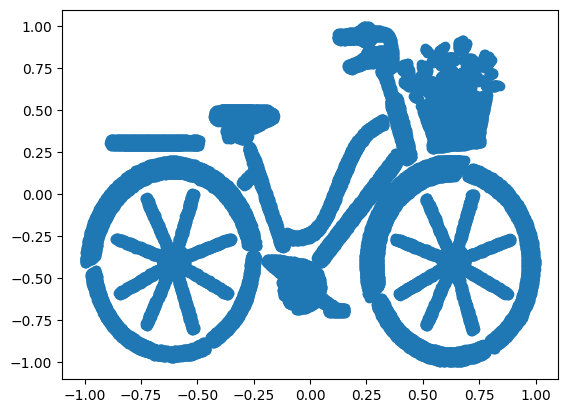

In [3]:
# 2-dimensional distribution of data - target distribution we'll try to approximate
# colorful image of dimensions 32x32x3 will be considered as one point of similar distribution. except 3072-dimensional
plt.scatter(x,y)

In [4]:
# Let's try to add noise to each point

In [5]:
n_steps = 1000 # number of noiseadding steps

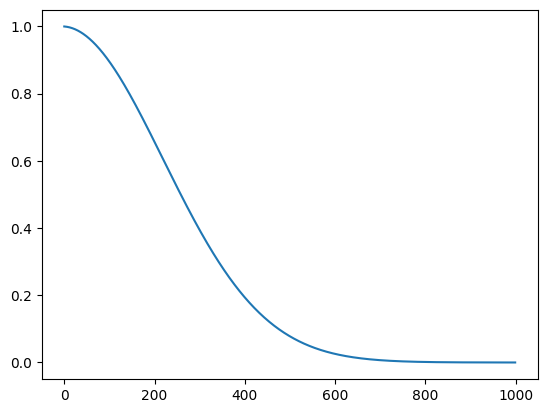

In [6]:
# parameters
betas = np.linspace(0.0001,0.02,n_steps)
alphas = 1 - betas
alpha_prods = np.cumprod(alphas)
plt.plot(alpha_prods)

In [7]:
# This method falls down to zero too quickly. We need another one
# turns out if we swap the range to 

In [8]:
steps = (np.arange(0,n_steps)-n_steps/2)/100
betas = np.exp(steps)/(1+np.exp(steps))
betas = betas*0.0101188381035 # value chosen by trial and error :)

0.49750365032222976


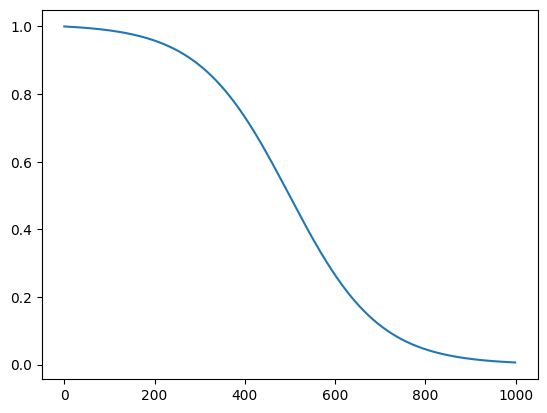

In [9]:
alphas = 1-betas
alpha_prods = np.cumprod(alphas)
print(alpha_prods[500])
plt.plot(alpha_prods)

In [10]:
# adding noise to the data

In [11]:
I = np.identity(2)
N = len(data)

In [12]:
noise = np.random.multivariate_normal((0,0),I,N*n_steps).reshape((n_steps,N,2)) *(1-alpha_prods).reshape(n_steps,1,1)

In [13]:
data_means = data*np.sqrt(alpha_prods).reshape((1000,1,1))

In [14]:
iterations = noise+data_means

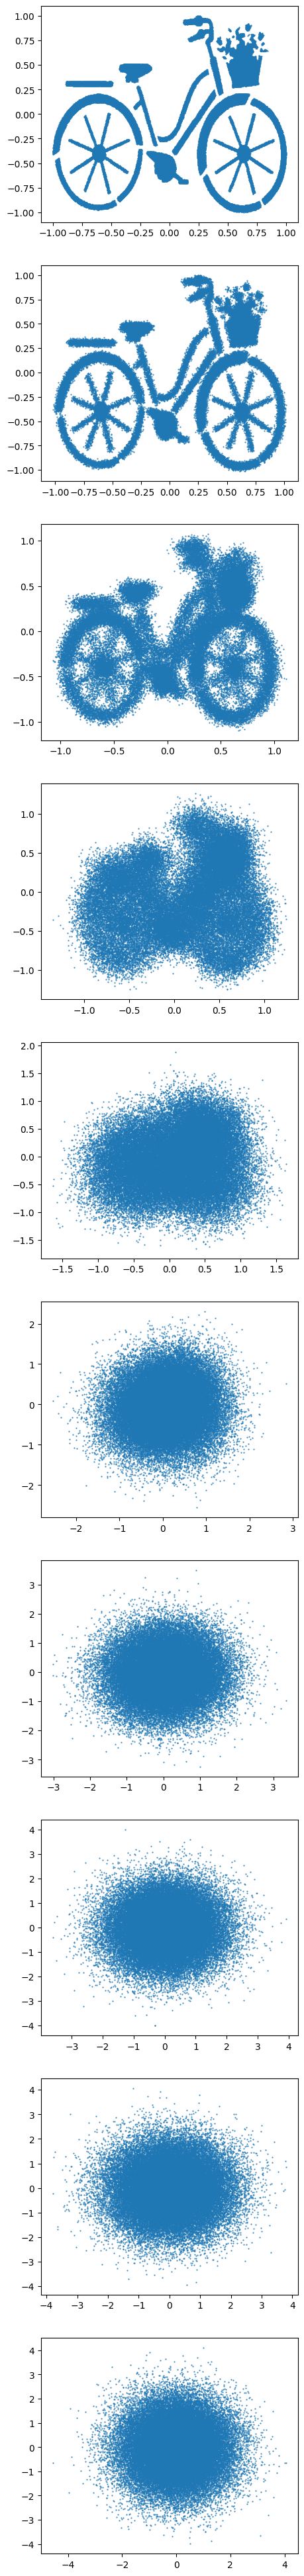

In [15]:
figure, axis = plt.subplots(10,figsize=(5,50))

for i in range(10):
    axis[i].scatter(iterations[i*100,:,0],iterations[i*100,:,1],marker=".",s=1)

plt.show()

In [19]:
class LearnableSinusoidalEmbedding(layers.Layer):
    def __init__(self,d=25,n=10000):  
        super(LearnableSinusoidalEmbedding, self).__init__()
        self.d = d
        self.denominator = tf.cast(tf.math.pow(n,tf.range(d)/d),tf.float32)
        self.dense1 = layers.Dense(128,input_shape=(2*d,),activation="relu")
        self.dense2 = layers.Dense(128)

    def call(self, k):
        k = tf.cast(k, tf.float32)
        # values of cosine and sine can be permuted however we want as we're feeding them to dense layers
        input = (tf.concat([tf.sin(k/self.denominator),tf.cos(k/self.denominator)],0))
        input = tf.reshape(tf.convert_to_tensor(input),(1,-1))
        output1 = self.dense1(input)
        return self.dense2(output1)

In [20]:
lse = LearnableSinusoidalEmbedding(25)

In [21]:
lse(1)

<tf.Tensor: shape=(1, 128), dtype=float32, numpy=
array([[ 8.0892414e-02,  1.9186854e-02,  2.6477706e-01, -1.1982551e-01,
         5.1755780e-01,  8.9646524e-01, -2.3579273e-01, -2.5315130e-01,
         4.0360340e-01, -8.4009528e-02, -2.4621055e-02,  3.5849668e-02,
         2.0997894e-01,  4.5180906e-02,  1.3167822e-01, -1.2448515e-01,
        -7.8289211e-04,  2.3638555e-01,  1.8164352e-01,  4.7795337e-01,
         2.5021267e-01, -3.6295706e-01, -6.1430693e-02, -1.2523401e-01,
        -2.3735420e-01, -5.6766540e-02,  4.6194029e-01, -2.6970568e-01,
         6.9646873e-02,  2.6099932e-01, -3.9891124e-01, -2.7149826e-02,
        -3.8293332e-01, -6.9505304e-01, -1.8721721e-01,  3.2139879e-02,
        -3.1782266e-01, -3.8215697e-01, -4.3212968e-01, -2.7669507e-01,
        -1.7471251e-01, -2.0624602e-01, -3.3262670e-03, -1.6548288e-01,
         1.7636305e-01, -2.2584514e-01, -2.4867961e-01, -5.5186182e-02,
         1.2518956e-01,  8.8700330e-01, -4.4320261e-01, -2.1887422e-02,
        -2.241